In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import spatial

In [28]:
num_facs = 6
num_allies = 12

In [38]:
facilities = 1024*np.random.random((num_facs, 2))
facilities

array([[ 212.47418888,  944.45854457],
       [ 561.48677054,  690.02259847],
       [ 395.74297179,  578.71285307],
       [ 120.77968823,   37.86031985],
       [ 236.11280818,  306.92071406],
       [ 598.58509024,  590.21260203]])

In [39]:
allies = 1024 * np.random.random((num_allies, 2))
allies

array([[  610.86606497,     6.96471724],
       [  265.84954176,   880.33697471],
       [  321.84524424,   903.24767025],
       [  114.66916326,   469.70866733],
       [  356.67007907,   955.05550016],
       [  286.06226883,   525.17293642],
       [  629.6207746 ,   447.48445432],
       [ 1015.08572675,   164.6162169 ],
       [  282.00997678,   821.20053673],
       [  845.84427725,    64.50767628],
       [   72.42488326,   879.62640253],
       [  758.78110135,   264.09606474]])

In [63]:
phalanx = 1024 * np.random.random(2)
phalanx

array([ 709.34217709,  815.08924235])

In [40]:
fac_kdtree = spatial.KDTree(facilities)

In [41]:
def get_nearest_facility(x, y):
    return facilities[fac_kdtree.query((x, y))[1]]

In [85]:
def get_potential_vector(x, y, k, v=1):
    FAC_MULT = 1.0
    ALLY_MULT = 1.0
    PHAL_MULT = 1.0
    
    Z_t = complex(x, y)
    P = complex(0, 0)
    if v == 1:
        for facility in facilities:
            Z_s = complex(facility[0], facility[1])
            Z = Z_s - Z_t
            radius = abs(Z)
            if radius >= 1:
                P += Z / (radius**k)
                
        for ally in allies:
            Z_s = complex(ally[0], ally[1])
            Z = Z_s - Z_t
            radius = abs(Z)
            if radius <= 64:
                P -= ALLY_MULT * Z / (radius**k)
        
        Z_s = complex(phalanx[0], phalanx[1])
        Z = Z_s - Z_t
        radius = abs(Z)
        if radius <= 120:
            P -= PHAL_MULT * Z / (radius**k)
    elif v == 2:
        facility = get_nearest_facility(x, y)
        Z_s = complex(facility[0], facility[1])
        Z = Z_s - Z_t
        radius = abs(Z)
        if radius > 32:
            P += Z / (radius**k)
            
        for ally in allies:
            Z_s = complex(ally[0], ally[1])
            Z = Z_s - Z_t
            radius = abs(Z)
            if radius <= 64:
                P -= ALLY_MULT * Z / (radius**k)
        
        Z_s = complex(phalanx[0], phalanx[1])
        Z = Z_s - Z_t
        radius = abs(Z)
        if radius <= 120:
            P -= PHAL_MULT * Z / (radius**k)
    elif v == 3:
        for facility in facilities:
            Z_s = complex(facility[0], facility[1])
            Z = Z_s - Z_t
            radius = abs(Z)
            if radius >= 1:
                P += 1 / (radius**k)
    return P

In [73]:
def calc_potential_vectors(X, Y, k, v):
    U = np.zeros((n, n))
    V = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            P = get_potential_vector(X[i][j], Y[i][j], k, v)
            U[i][j], V[i][j] = P.real, P.imag
    return U, V

In [74]:
n = 100

In [75]:
X = np.linspace(0, 1024, n)
Y = np.linspace(0, 1024, n)

In [76]:
X, Y = np.meshgrid(X, Y)

In [83]:
U_1, V_1 = calc_potential_vectors(X, Y, k=4, v=1)
U_2, V_2 = calc_potential_vectors(X, Y, k=1, v=2)

<IPython.core.display.Javascript object>


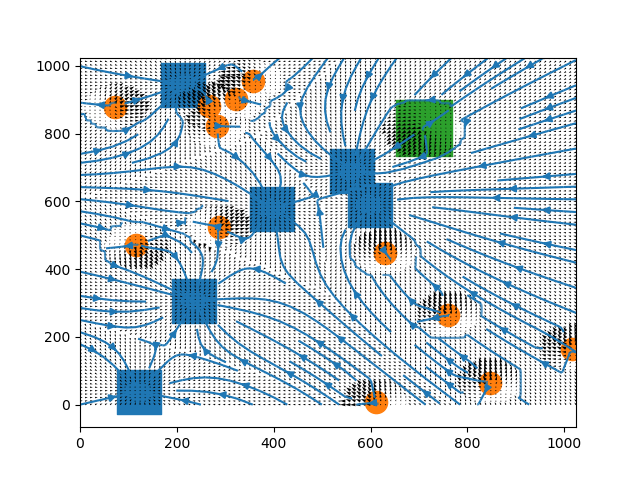

In [86]:
plt.scatter(facilities.T[0], facilities.T[1], s=1024, marker="s")
plt.scatter(allies.T[0], allies.T[1], s=256)
plt.scatter([phalanx[0]], [phalanx[1]], s=1600, marker="s")
plt.streamplot(X, Y, U_1, V_1)
plt.quiver(X, Y, U_2, V_2)